# Overview

1. Dataset Review
2. Light Data Exploration
3. Exploratory Data Analysis
4. Data Preprocessing
5. Model Building
6. Model Validation
7. Renaming the clusters





In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Dataset Review

In [299]:
df = pd.read_csv("customer_behavior_analytcis.csv")

In [300]:
df.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004


**Information and Missing values**

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   979 non-null    float64
 1   avg_cart_value    979 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     979 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


In [302]:
df.describe()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
count,979.000000,979.000000,999.000000,979.000000,999.000000
mean,11.570991,75.457978,49.348759,28.237998,4.313313
std,7.016327,55.067835,32.730973,16.296384,4.532772
min,0.000000,10.260000,5.120000,4.000000,0.000000
25%,6.000000,33.130000,22.375000,16.000000,1.000000
50%,10.000000,49.380000,40.360000,21.000000,2.000000
75%,17.000000,121.255000,77.170000,45.000000,8.000000
max,32.000000,199.770000,119.820000,73.000000,21.000000


**Duplicate Values**

In [303]:
df['customer_id'].duplicated().sum()

0

# Light Data Exploration

In [304]:
df['total_purchases'].unique()

array([ 7., 22.,  2., 25., 12., 23., 27.,  9., 30.,  5.,  6., 13., 21.,
       15., 28., 24.,  4.,  3., 10., 17., 16., 29., 18.,  8., 19., 20.,
       14., nan, 11.,  1., 26., 32.,  0.])

In [305]:
df['avg_cart_value'].unique()

array([129.34,  24.18,  32.18,  26.85, 125.45, 199.56,  43.48,  46.58,
        35.1 ,  40.69,  62.6 ,  60.77, 105.96,  26.34, 100.  , 101.29,
        21.48,  48.23, 167.25,  42.  ,  37.21,  23.37,  20.49,  53.25,
        55.45, 167.57,  29.86, 196.93,  71.22, 180.97, 177.98, 159.86,
        13.66, 145.42,  54.62,  46.98, 117.71,  73.25, 187.29,  29.22,
        45.23,  55.15,  38.11,  11.88,  11.48,  18.26, 119.62, 158.27,
        49.86,  16.87,  37.37, 197.09,  51.23,  13.42,  45.09,  21.73,
       102.57,  37.52,  65.22,  73.75,  36.53, 173.02,  45.44, 144.3 ,
        35.9 ,  44.96,  26.35,  37.9 ,  43.4 ,  30.41,  27.63,  28.13,
        42.63,  41.98, 154.89, 108.61,  70.91,  43.91,  64.42, 142.64,
       106.2 , 107.12, 194.59,  61.2 , 109.66,  19.81, 143.28,  29.58,
        25.33,  33.72,  52.48,  59.02, 151.63,  44.74,  38.33,  20.57,
        48.01,    nan, 194.9 ,  16.21,  16.65,  44.68,  14.26,  36.72,
       188.33, 162.57,  30.23, 124.03,  26.23,  20.39,  68.64,  41.18,
      

In [306]:
df['total_time_spent'].unique()

array([ 52.17,   9.19,  90.69,  11.22,  34.19,  43.39,  13.11,   7.2 ,
         9.24,  16.34,  77.2 ,  78.66,  40.82,  14.85,  28.4 ,  51.21,
         5.64,   5.76,  42.02,  22.01,  97.61,  25.43,  13.49, 118.66,
        85.37,  50.32,  65.17,  51.28,  76.43,  41.96,  42.14,  51.02,
        22.08,  36.43,  89.83,  26.84,  47.02, 115.03,  52.41,  23.46,
        10.94,  60.26,  99.57,  14.92,  20.79,  29.67,  42.21,  57.66,
        80.43,  17.  ,  87.37,  30.09,  73.65,  10.33, 115.76,  15.23,
        27.23,  28.18,  94.53, 113.7 ,  93.26,  49.99,  17.87,  27.95,
        79.72,  22.56,  14.16,   5.29,  83.94,  29.34,   6.14,  16.09,
        10.48,  44.4 ,  44.17,  98.69, 107.52,  69.85,  22.91,  50.08,
        40.51,  36.11,  79.37,  31.53,  10.  ,  32.48,  26.71,   5.83,
        25.95,  93.93,  84.11,  39.02,   8.13,   5.14,  69.45,  22.98,
       117.04,  44.85,   8.25,   8.32,  68.68,  21.09,  11.86,  37.1 ,
        34.77,  89.63,  36.76,  80.28,  19.5 , 103.49,  17.89,  18.16,
      

In [307]:
df['product_click'].unique()

array([18., 15., 50., 16., 30., 20., 12., 14., 25., 21., 49., 53.,  9.,
       19., 23., 17., 10., 43., 46., 54., 22., 13., 11., 51., 63., 58.,
       37., 45., 61., 56.,  5., 24., 41., 32., 59., nan, 47., 26., 42.,
       31., 55., 48.,  6., 52., 57., 39., 44., 33., 29., 28., 60., 64.,
       38., 27., 66.,  4.,  8.,  7., 35., 40., 34., 65., 73., 67., 62.])

In [308]:
df['discount_counts'].unique()

array([ 0.,  7.,  2., 10.,  3.,  8.,  4.,  6.,  5., 11.,  9.,  1., 12.,
       16., 17., 13., 15., 18., 21., 14., 20.])

# Data Cleaning

In [309]:
def clean(data):
  data['total_purchases'].fillna(data['total_purchases'].mean(), inplace = True)
  data['avg_cart_value'].fillna(data['avg_cart_value'].mean(), inplace = True)
  data['product_click'].fillna(data['product_click'].mean(), inplace = True)

In [310]:
clean(df)

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purchases   999 non-null    float64
 1   avg_cart_value    999 non-null    float64
 2   total_time_spent  999 non-null    float64
 3   product_click     999 non-null    float64
 4   discount_counts   999 non-null    float64
 5   customer_id       999 non-null    object 
dtypes: float64(5), object(1)
memory usage: 47.0+ KB


# Exploratory Data Analysis

**Correlation Heatmap**

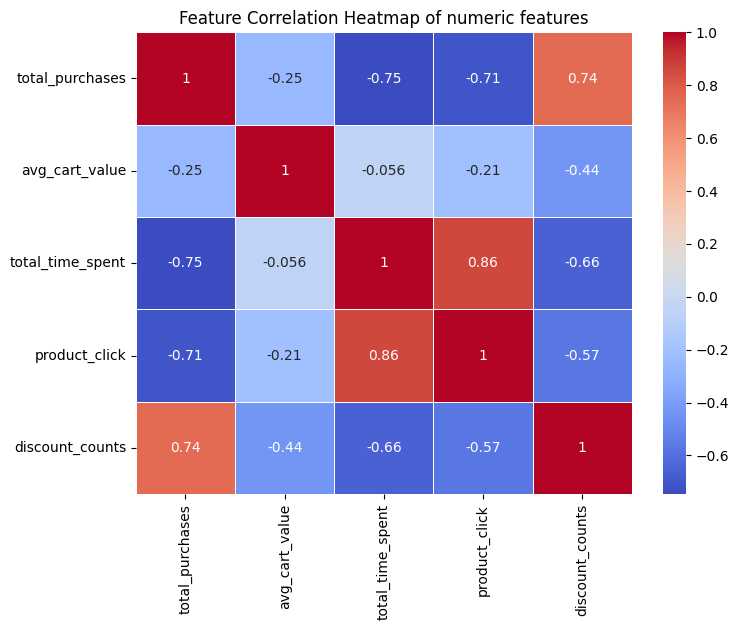

In [312]:
features = [c for c in df.columns if c != 'customer_id']

plt.figure(figsize=(8, 6))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap of numeric features")
plt.show()

**Feature Distributions**

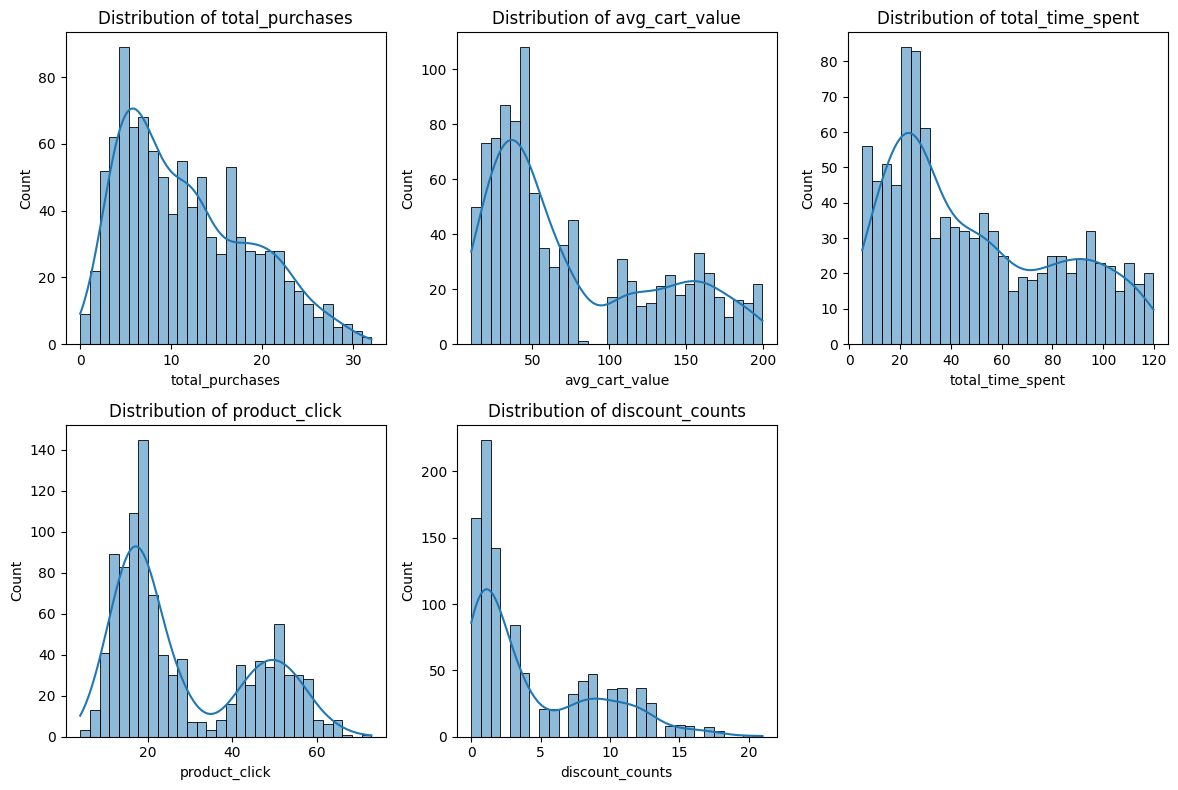

In [313]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

**Boxplots for Outlier Detection**

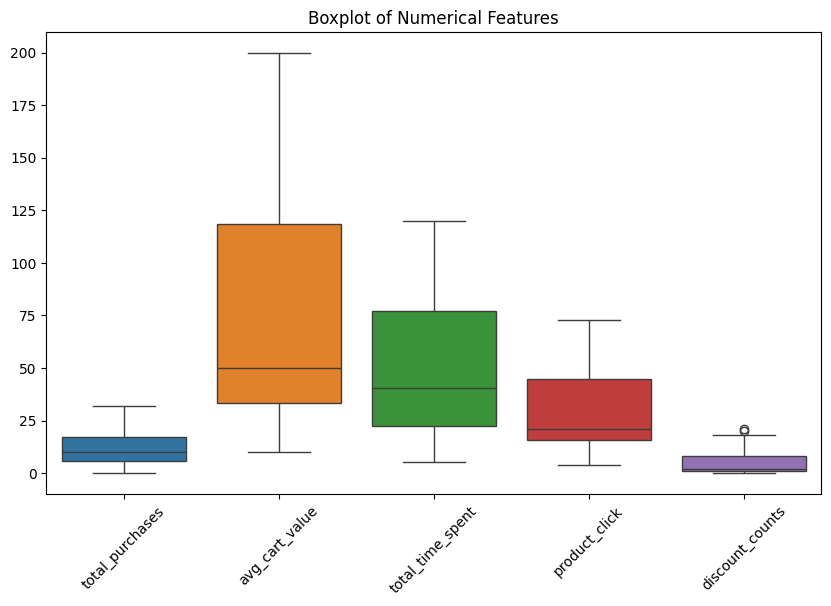

In [314]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[features])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

**Outlier Detection**

In [315]:
def detect_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

for feature in features:
    outliers = detect_outliers_iqr(df, feature)
    print(f"{feature}: {len(outliers)} outliers detected")


total_purchases: 0 outliers detected
avg_cart_value: 0 outliers detected
total_time_spent: 0 outliers detected
product_click: 0 outliers detected
discount_counts: 2 outliers detected


In [316]:
# Detect outliers in discount_count using IQR method
Q1 = df["discount_counts"].quantile(0.25)
Q3 = df["discount_counts"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Displaying the outlier rows
outliers = df[(df["discount_counts"] < lower_bound) | (df["discount_counts"] > upper_bound)]
print(outliers)

     total_purchases  avg_cart_value  total_time_spent  product_click  \
174             15.0           18.81             29.43            9.0   
866             19.0           39.50             20.43            9.0   

     discount_counts customer_id  
174             21.0     CM00174  
866             20.0     CM00866  




*   These outliers in discount_counts can be the customers that legitimately use discounts heavily. So keeping them is the best choice.



**Pairplots**

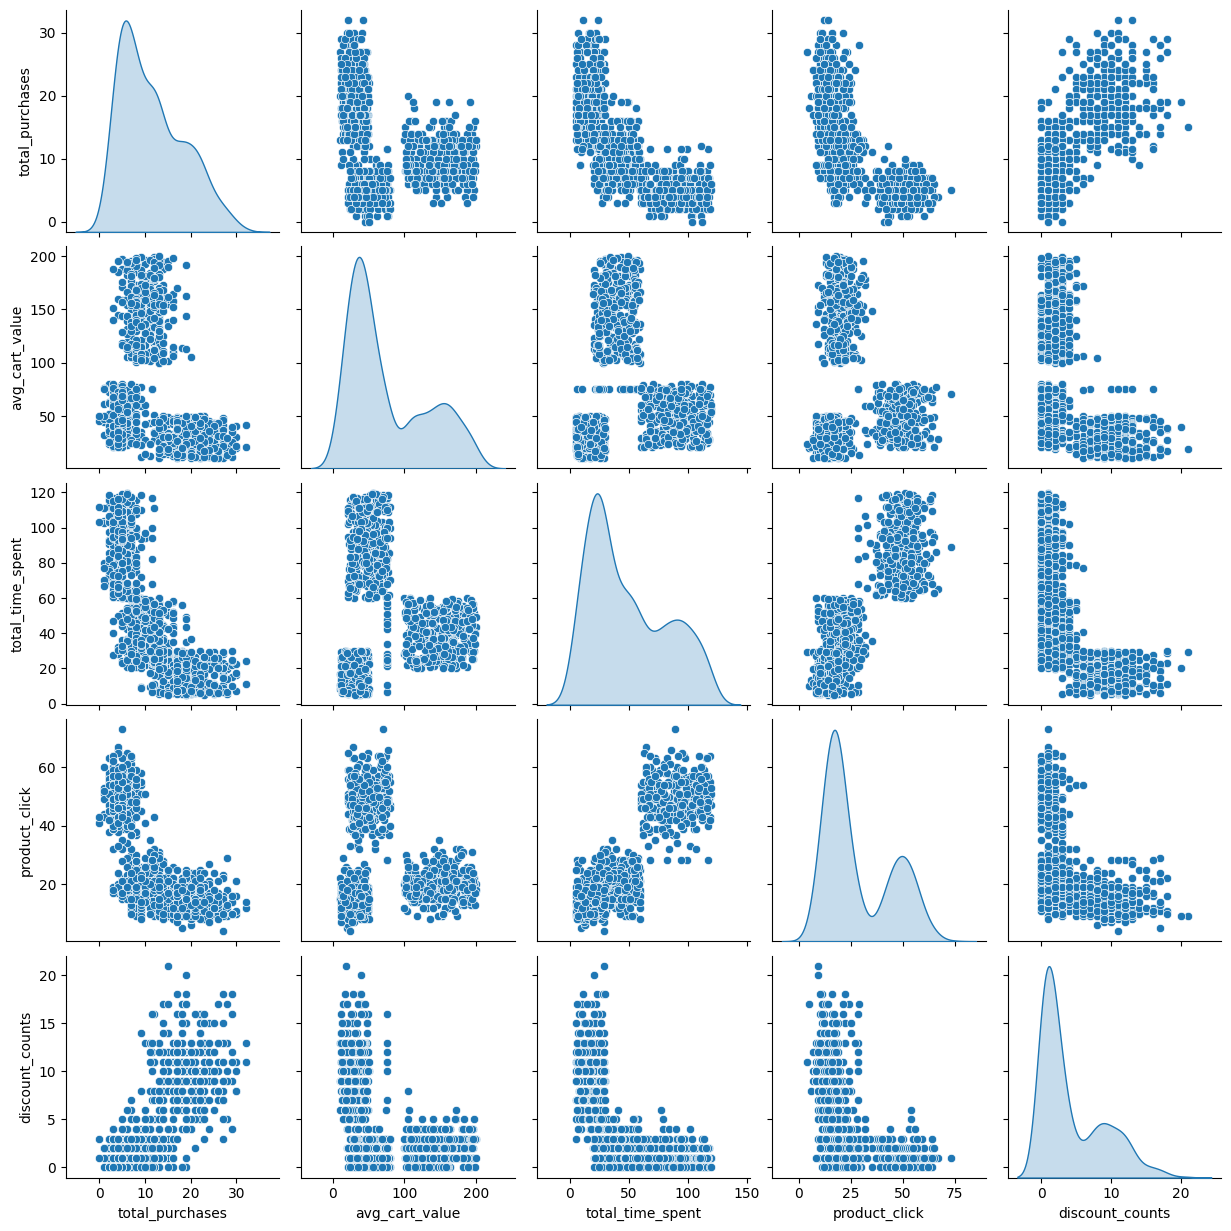

In [317]:
sns.pairplot(df[features], diag_kind="kde")
plt.show()

**Discount usage patterns**

In [318]:
df["discount_category"] = pd.cut(df["discount_counts"], bins=[-1, 1, 5, df["discount_counts"].max()],
                                 labels=["Low", "Moderate", "High"])

# Analyze discount usage patterns
df.groupby("discount_category")['customer_id'].count()


,customer_id
discount_category,
Low,389
Moderate,295
High,315


**Purchasing patterns**

In [319]:
df["purchase_category"] = pd.qcut(df["total_purchases"], q=3, labels=["Low", "Medium", "High"])

# Check average cart value and discount usage across purchase groups
df.groupby("purchase_category")[["avg_cart_value", "discount_counts"]].mean()

,avg_cart_value,discount_counts
purchase_category,,
Low,67.234578,1.209809
Medium,118.002860,3.089231
High,40.249186,9.319218


**Spending patterns**

In [320]:
df["spending_category"] = pd.qcut(df["avg_cart_value"], q=3, labels=["Low", "Medium", "High"])

# Compare purchase behavior across spending levels
df.groupby("spending_category")[["total_purchases", "discount_counts", "total_time_spent"]].mean()


,total_purchases,discount_counts,total_time_spent
spending_category,,,
Low,15.180180,7.195195,39.989820
Medium,9.487747,3.792793,66.576036
High,10.045045,1.951952,41.480420


**Engagement patterns**

In [321]:
df["engagement_category"] = pd.qcut(df["total_time_spent"], q=3, labels=["Low", "Medium", "High"])

# Analyze how engagement relates to spending
df.groupby("engagement_category")[["total_purchases", "avg_cart_value", "product_click"]].mean()


,total_purchases,avg_cart_value,product_click
engagement_category,,,
Low,18.404257,46.797188,15.941576
Medium,11.302534,130.653721,19.399220
High,4.963528,49.426666,49.393964


**Browsing patterns**

In [322]:
df["browsing_category"] = pd.qcut(df["product_click"], q=3, labels=["Low", "Medium", "High"])

# Check if browsing affects purchases
df.groupby("browsing_category")[["total_purchases", "discount_counts"]].mean()

,total_purchases,discount_counts
browsing_category,,
Low,17.168639,7.754438
Medium,12.521033,4.069909
High,4.930723,1.051205


**Skewness Tests**

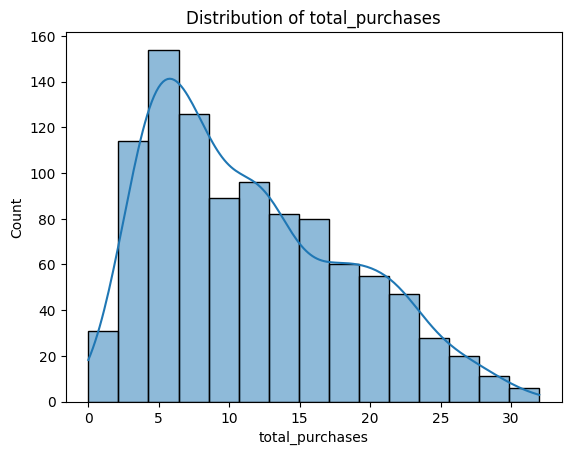

Skewness of total_purchases: 0.6442418659361975


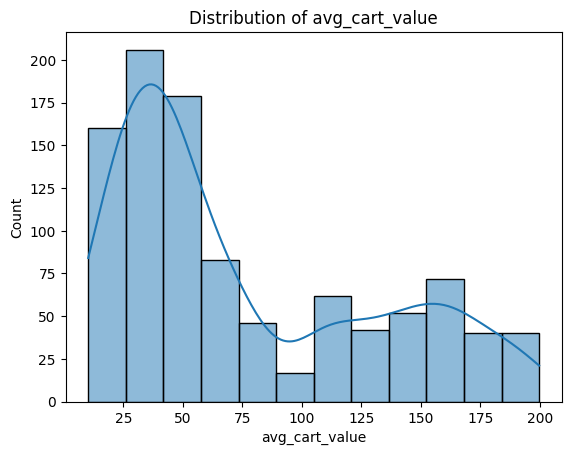

Skewness of avg_cart_value: 0.7955493335405279


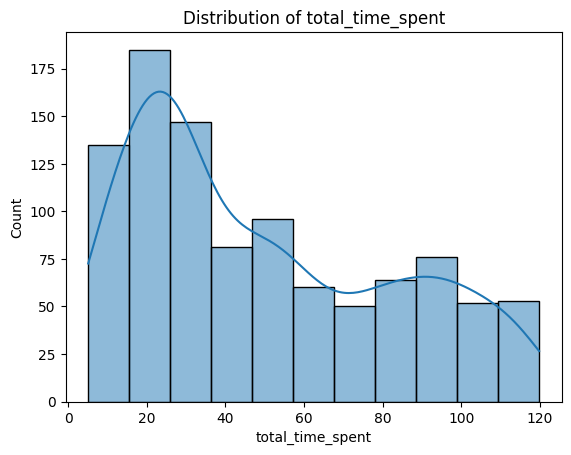

Skewness of total_time_spent: 0.5647596812759453


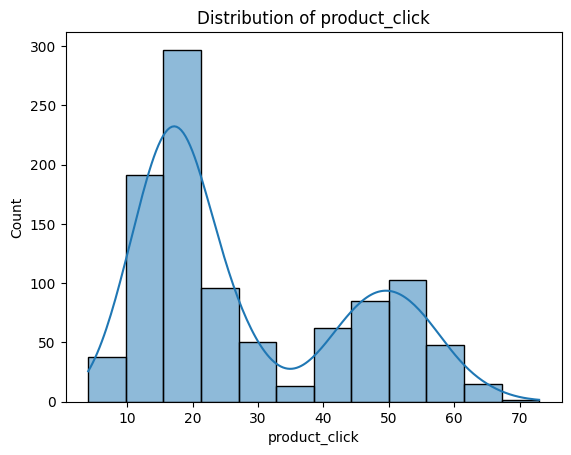

Skewness of product_click: 0.6974708206609713


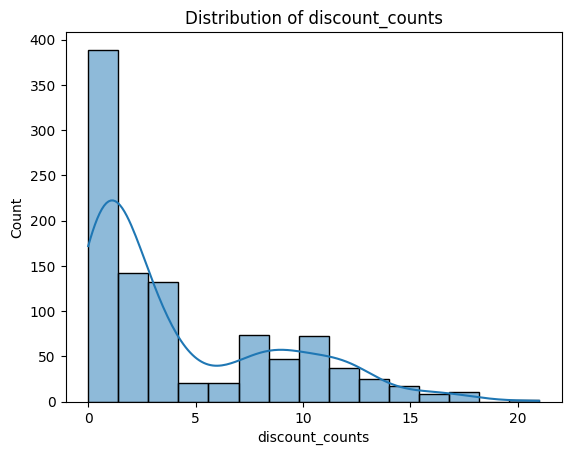

Skewness of discount_counts: 1.070384682714244


In [323]:
numerical_columns = ["total_purchases", "avg_cart_value", "total_time_spent", "product_click", "discount_counts"]

for column in numerical_columns:
    # Histogram and KDE for distribution
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

    # Skewness measure
    skew_value = df[column].skew()
    print(f"Skewness of {column}: {skew_value}")

# Data Preprocessing

In [324]:
from sklearn.preprocessing import StandardScaler

In [325]:
def preprocess(data):
  # Transform the discount_counts column
  data['discount_counts'] = np.log1p(data['discount_counts'])  # log(1 + x) to handle zeros

  # Droped non-numeric columns
  data = data.drop(['customer_id','discount_category','purchase_category','spending_category','engagement_category','browsing_category'], axis=1)


  # Feature scaling
  features = ["total_purchases", "avg_cart_value", "total_time_spent", "product_click", "discount_counts"]
  scaler = StandardScaler()
  data[features] = scaler.fit_transform(data[features])

  return data


In [326]:
df_scaled = preprocess(df)

In [327]:
df_scaled.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
0,-0.658436,0.988916,0.086238,-0.634946,-1.474140
1,1.502265,-0.941123,-1.227549,-0.821002,0.886791
2,-1.378670,-0.794296,1.263694,1.349649,-0.226811
3,1.934405,-0.892119,-1.165497,-0.758984,1.248353
4,-0.658436,0.917521,-0.463364,0.109277,0.099814


# Model Building

**K-Means**

In [328]:
import sklearn
from sklearn.cluster import KMeans

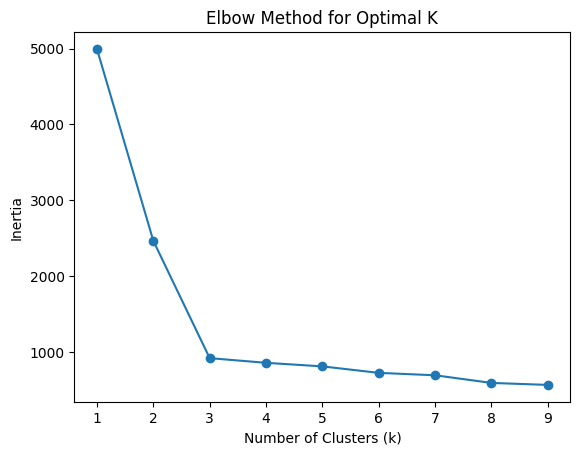

In [329]:
inertia = []
K_range = range(1, 10)  # Test different cluster numbers
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()


In [330]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster_kmeans"] = kmeans.fit_predict(df_scaled)

**Data Visualization**

In [331]:
from sklearn.decomposition import PCA

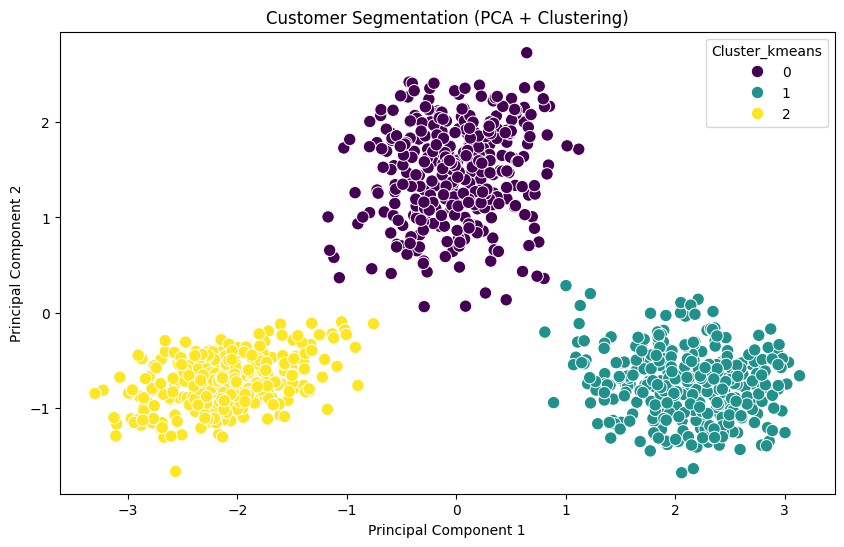

In [332]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df["Cluster_kmeans"], palette="viridis", s=80)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segmentation (PCA + Clustering)")
plt.show()


In [333]:
centroids = kmeans.cluster_centers_

print("Cluster Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")


Cluster Centroids:
Cluster 0: [-0.19620293  1.28735167 -0.27385426 -0.50496736 -0.38897962]
Cluster 1: [-0.95178349 -0.47776173  1.24703104  1.31206372 -0.80545107]
Cluster 2: [ 1.14798642 -0.80958994 -0.97317679 -0.80709635  1.19443069]


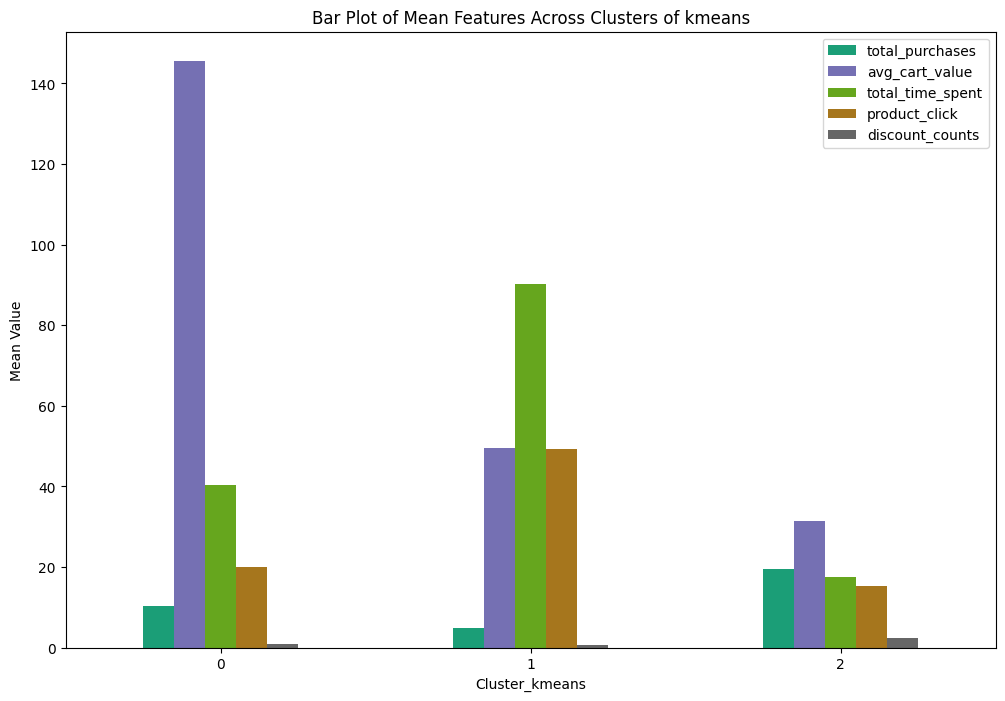

In [334]:
grouped_kmeans = df.groupby('Cluster_kmeans')[['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']].mean()

grouped_kmeans.plot(kind='bar', figsize=(12, 8), colormap='Dark2')
plt.title('Bar Plot of Mean Features Across Clusters of kmeans')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.show()

**Observations**



*   0 - High Spenders
*   1 - Window Shoppers
*   2 - Bargain Hunters









**Guassian-Mixture Model**

In [335]:
from sklearn.mixture import GaussianMixture

In [336]:
gmm = GaussianMixture(n_components=3)
df['Cluster_gmm'] = gmm.fit_predict(df_scaled)

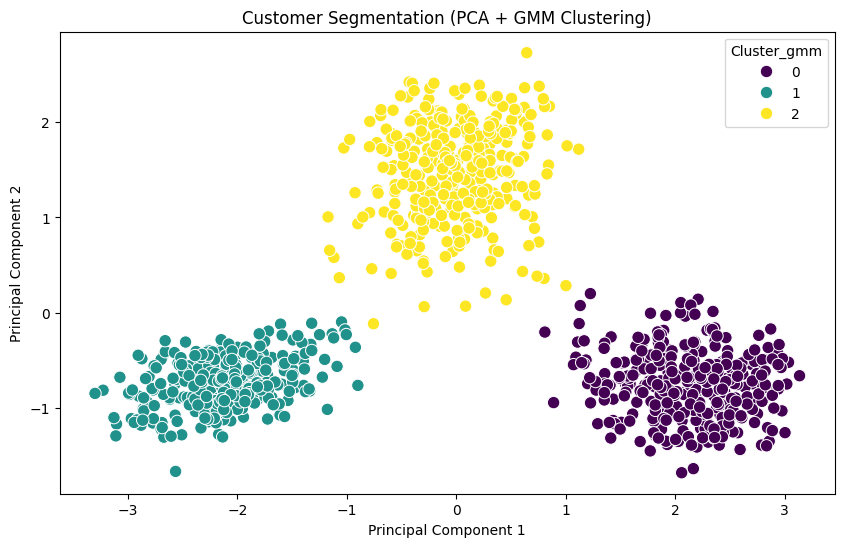

In [337]:
# Visualize using PCA
pca_gmm = PCA(n_components=2)
df_pca_gmm = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca_gmm[:, 1], hue=df['Cluster_gmm'], palette="viridis", s=80)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segmentation (PCA + GMM Clustering)")
plt.show()

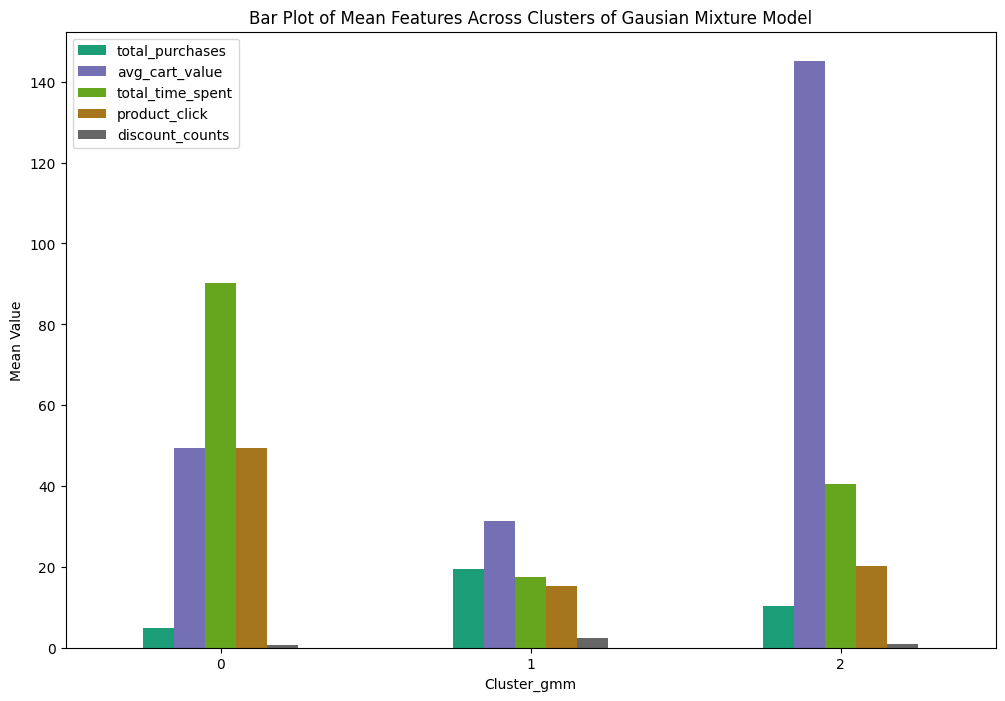

In [338]:
grouped_gmm = df.groupby('Cluster_gmm')[['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']].mean()

grouped_gmm.plot(kind='bar', figsize=(12, 8), colormap='Dark2')
plt.title('Bar Plot of Mean Features Across Clusters of Gausian Mixture Model')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.show()

**Agglomerative Clustering**

In [339]:
from sklearn.cluster import AgglomerativeClustering

In [340]:
agg_clust = AgglomerativeClustering(n_clusters=3)
df['Cluster_agg'] = agg_clust.fit_predict(df_scaled)

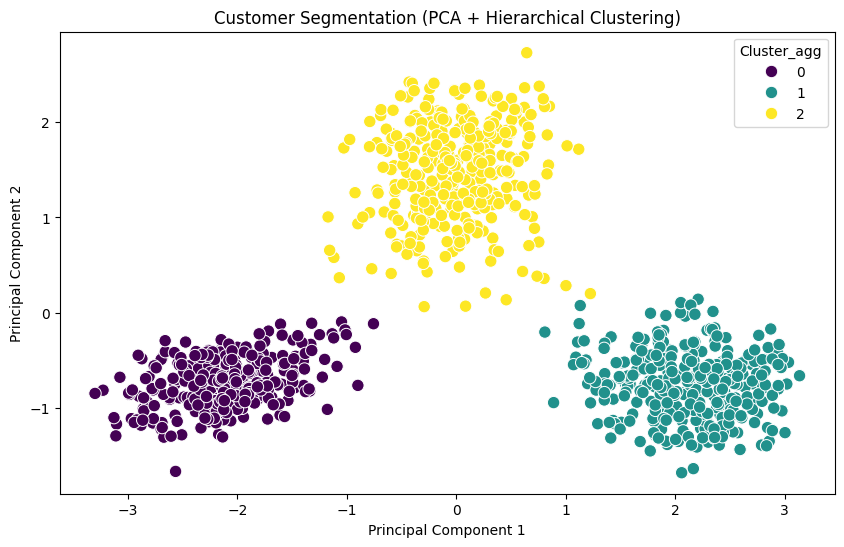

In [341]:
# Visualize using PCA
pca = PCA(n_components=2)
df_pca_agg = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca_agg[:, 1], hue=df['Cluster_agg'], palette="viridis", s=80)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Customer Segmentation (PCA + Hierarchical Clustering)")
plt.show()

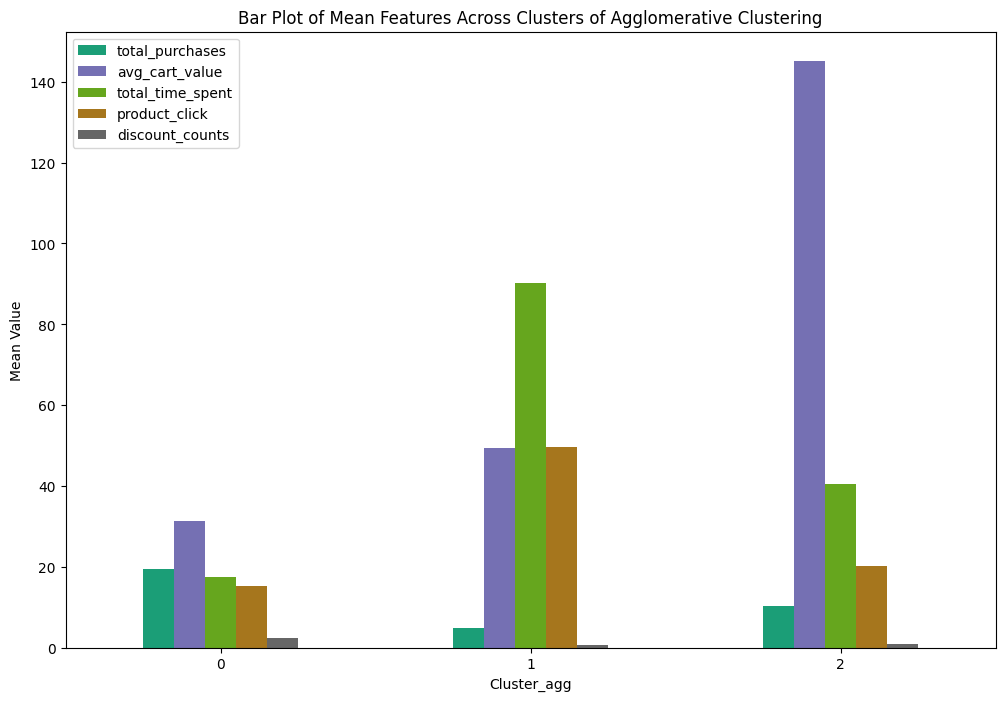

In [342]:
grouped_agg = df.groupby('Cluster_agg')[['total_purchases', 'avg_cart_value', 'total_time_spent', 'product_click', 'discount_counts']].mean()

# Plotting barplot
grouped_agg.plot(kind='bar', figsize=(12, 8), colormap='Dark2')
plt.title('Bar Plot of Mean Features Across Clusters of Agglomerative Clustering')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.show()

# Model Validation

In [343]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [344]:
drop_col = ['customer_id','discount_category','purchase_category','spending_category','engagement_category','browsing_category']

In [345]:
sil_score = silhouette_score(df.drop(columns=drop_col), df['Cluster_kmeans'])
print(f"Silhouette Score of K-Means: {sil_score}")


Silhouette Score of K-Means: 0.6625526581475173


In [346]:
db_score = davies_bouldin_score(df.drop(columns=drop_col), df['Cluster_kmeans'])
print(f"Davies-Bouldin Score of K-Means: {db_score}")


Davies-Bouldin Score of K-Means: 0.4639120435682565


In [347]:
sil_score = silhouette_score(df.drop(columns=drop_col), df['Cluster_gmm'])
print(f"Silhouette Score of GMM: {sil_score}")

Silhouette Score of GMM: 0.6613000264911634


In [348]:
db_score = davies_bouldin_score(df.drop(columns=drop_col), df['Cluster_gmm'])
print(f"Davies-Bouldin Score of GMM: {db_score}")

Davies-Bouldin Score of GMM: 0.4650956975900955


In [349]:
sil_score = silhouette_score(df.drop(columns=drop_col), df['Cluster_agg'])
print(f"Silhouette Score of Agglomerative Clustering: {sil_score}")

Silhouette Score of Agglomerative Clustering: 0.6605929363986061


In [350]:
db_score = davies_bouldin_score(df.drop(columns=drop_col), df['Cluster_agg'])
print(f"Davies-Bouldin Score of Agglomerative clustering: {db_score}")

Davies-Bouldin Score of Agglomerative clustering: 0.4653257966783446


| Clustering Algorithm     | Silhouette Score | Davies-Bouldin Score |
|--------------------------|------------------|----------------------|
| K-Means                  | 0.6625         | 0.4639               |
| Gaussian Mixture Model   | 0.6613        | 0.4650               |
| Agglomerative Clustering |   0.6605      | 0.4653            |





*   K-Means is the best clustering algorithm according to the above results



# Renaming the clusters

In [351]:
cluster_mapping_knn = {0: "High Spenders", 1: "Window Shoppers", 2: "Bargain Hunsters"}
df['Customer_segment'] = df['Cluster_kmeans'].map(cluster_mapping_knn)

In [352]:
df.head()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id,discount_category,purchase_category,spending_category,engagement_category,browsing_category,Cluster_kmeans,Cluster_gmm,Cluster_agg,Customer_segment
0,7.0,129.34,52.17,18.0,0.000000,CM00000,Low,Low,High,Medium,Medium,0,2,2,High Spenders
1,22.0,24.18,9.19,15.0,2.079442,CM00001,High,High,Low,Low,Low,2,1,0,Bargain Hunsters
2,2.0,32.18,90.69,50.0,1.098612,CM00002,Moderate,Low,Low,High,High,1,0,1,Window Shoppers
3,25.0,26.85,11.22,16.0,2.397895,CM00003,High,High,Low,Low,Low,2,1,0,Bargain Hunsters
4,7.0,125.45,34.19,30.0,1.386294,CM00004,Moderate,Low,High,Medium,Medium,0,2,2,High Spenders
